# Einführung

#### 1.1 Definition einer Zeitreihe und erstes Beispiel

Abbildung 1.1

/var/folders/j6/crbdq5cj44gdh0ck9d749wpc0000gn/T/ipykernel_34214/1036352519.py:19: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7)


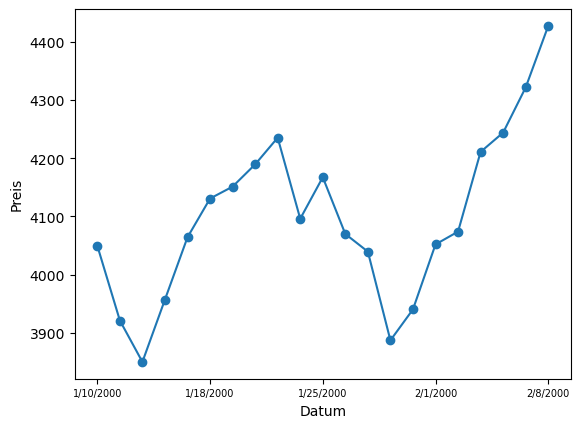

In [2]:
import matplotlib.pyplot as plt
import csv

# Leere Listen für die x- und y-Werte initialisieren
x = []
y = []

# Dateiname definieren
filename = 'Nasdaq.csv'

# Datei öffnen und durch CSV-Leser lesen
with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    # Durch jede Zeile der CSV-Datei iterieren
    for row in reader:
        # Überspringen der Überschriftenzeile
        if row[0] == 'Date':
            pass
        # Prozess abbrechen, wenn das Datum 2/9/2000 erreicht ist
        elif row[0] == '2/9/2000':
            break
        # Andernfalls füge das Datum zu x und den Preis zu y hinzu
        else:
            x.append(row[0])
            y.append(float(row[5]))

# Ein neues Diagramm erstellen
fig, axs = plt.subplots()

# Die Schriftgröße der X-Achsen-Tick-Labels auf 7 setzen
for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(7)
    
# X- und Y-Achsen beschriften
plt.xlabel("Datum")
plt.ylabel("Preis")

# Die Anzahl der Hauptmarkierungen auf der x-Achse auf 5 beschränken
axs.xaxis.set_major_locator(plt.MaxNLocator(5))

# Datenpunkte mit Linien verbinden und auf der Achse darstellen
axs.plot(x, y, "-o")


### 1.2 Einführung in Zeitreihenmodelle


#### 1.2.1.1 Unabhängig und identisch verteilt (iid Daten)

Abbildung 1.2

/var/folders/j6/crbdq5cj44gdh0ck9d749wpc0000gn/T/ipykernel_34214/1735181733.py:19: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7)


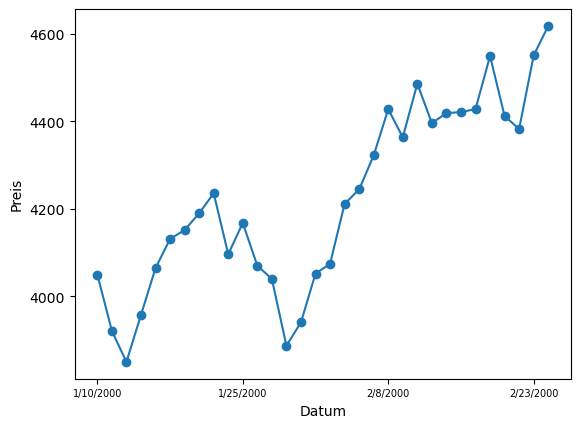

In [3]:

import csv

# Initialisierung der leeren Listen für die x- und y-Achse
x = []
y = []

# Festlegung des Dateinamens
filename = 'Nasdaq.csv'

# Öffnen der CSV-Datei zum Lesen
with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    # Durchlaufen aller Zeilen in der CSV-Datei
    for row in reader:
        # Wenn die Zeile den Spaltenkopf "Date" enthält, wird sie übersprungen
        if row[0] == 'Date':
            pass
        # Wenn das Datum 2/25/2000 erreicht ist, wird die Schleife abgebrochen
        elif row[0] == '2/25/2000':
            break
        # Ansonsten werden das Datum und der Preis den Listen x und y hinzugefügt
        else:
            x.append(row[0])
            y.append(float(row[5]))

# Erstellung einer neuen Diagrammfigur
fig, axs = plt.subplots()

# Anpassung der Schriftgröße der Hauptmarkierungen auf der x-Achse auf 7
for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(7)
    
# Beschriftung der x- und y-Achsen des Diagramms
plt.xlabel("Datum")
plt.ylabel("Preis")

# Begrenzung der Anzahl der Hauptmarkierungen auf der x- und y-Achse
axs.xaxis.set_major_locator(plt.MaxNLocator(4))
axs.yaxis.set_major_locator(plt.MaxNLocator(5))

# Darstellung der Datenpunkte auf dem Diagramm, verbunden durch Linien
axs.plot(x, y, "-o")


#### 1.2.1.2 White Noise

Abbildung 1.3

Varianz:  0.7816116829242019


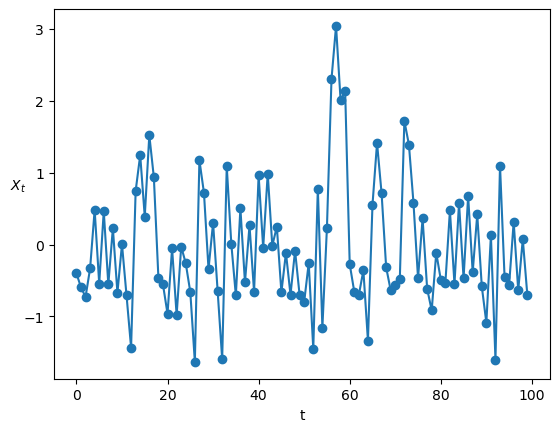

In [6]:

from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import math

# Festlegung der Anzahl der zu generierenden Zufallsvariablen
size = 100

# Generierung von 100 unabhängigen normalverteilten Zufallsvariablen mit Mittelwert 0 und Standardabweichung 1
z = np.random.normal(loc=0, scale=1, size=size)  

x = list(range(size))

x_t = []

# Durchlaufen aller Werte von 0 bis size-1
for i in range(size):
    # Wenn der Index gerade ist, wird der z-Wert zum x_t hinzugefügt
    if i % 2 == 0:
        x_t.append(z[i])
    # Wenn der Index ungerade ist, wird eine berechnete Funktion von z[i-1] zum x_t hinzugefügt
    elif i % 2 != 0:
        x_t.append((((z[i-1])**2 - 1)) * (1/math.sqrt(2)))

# Erstellung eines Diagramms
fig, axes = plt.subplots()

plt.ylabel("$X_t$", rotation=0)
plt.xlabel('t')

axes.plot(x, x_t, "-o")

# Ausgabe der Varianz von x_t
print("Varianz: ", + np.var(x_t))


Abbildung 1.4

Text(0, 0.5, 'Autokovarianz')

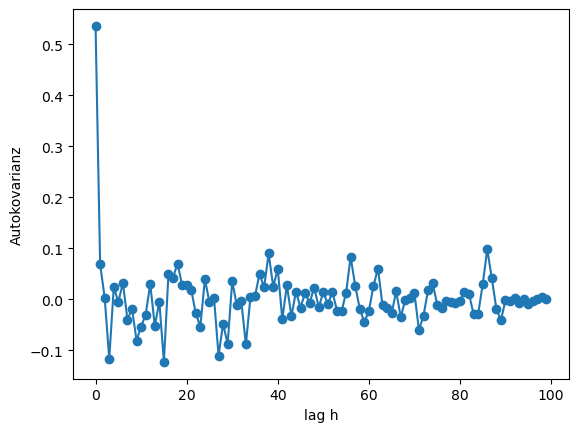

In [5]:

t = np.size(x_t)
u = np.mean(x_t)
autokovarianz_list = []
def autokovarianze(y, t, h, u):
    autokov = 0
    for i in np.arange(0, t-h):
        autokov += ((y[i+h])-u)*(y[i]-u)
    return (1/(t))*autokov
for i in range(100):
    autokovarianz_list.append(autokovarianze(x_t, t, i, u))

x = list(range(100))
fig, axs = plt.subplots()
axs.plot(x, autokovarianz_list, "-o")
plt.xlabel('lag h')
plt.ylabel('Autokovarianz')

#### 1.2.1.3 Random Walk

Abbildung 1.5

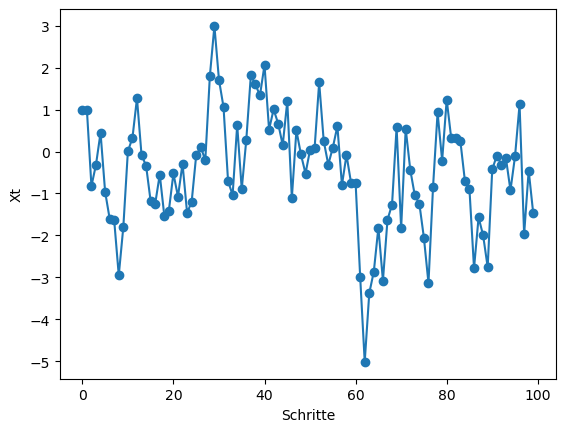

In [8]:
from random import random
from random import gauss
import matplotlib.pyplot as plt
y = [1]
A0 = 0
A1 = 0.7
iid = np.random.normal(loc=0,scale=1,size=size)
for i in range(99):
    y.append(A0 + A1* y[i] + iid[i])

x = list(range(100))
fig, axs = plt.subplots()
plt.xlabel("Schritte")
plt.ylabel("Xt")
axs.plot(x, y, "-o")


### 1.2.2 Models mit Trend und Saisonalität

#### 1.2.2.1 Zeitreihe mit Trendkomponente

Abbildung 1.6

Text(0, 0.5, 'Xt')

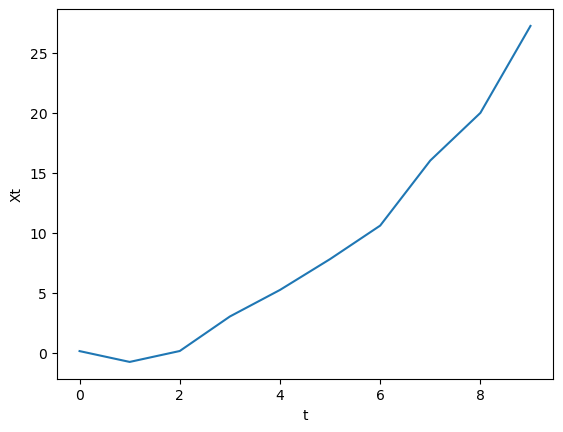

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# e: White-noise Normalverteilung N(0,1)
e = np.random.normal(loc=0.0, scale=1.0, size=10)
x = list(range(len(e)))
trend = []
# Trendkomponent m(t) = 1/3*x^2
for element in x:
    trend.append((1/3) * (element ** 2))
X = []
i = 0
for element in e:
    X.append(element + trend[i])
    i+=1
plt.plot(x,X)
plt.xlabel('t')
plt.ylabel('Xt')


Abbildung 1.7

Text(0, 0.5, 'Xt')

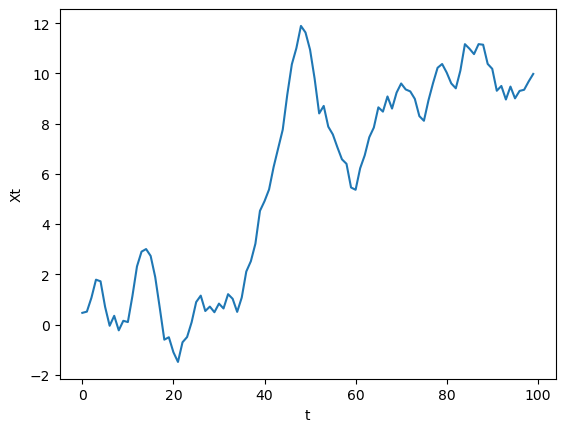

In [25]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

X = np.random.randn(100)
for t in range(1, len(X)):
    X[t] = X[t-1] + (random.randint(0, 100)/1000)  # Trend.
    X[t] = X[t] + (random.randint(-100, 100)/100)  # Random [1,-1].
for t in range(1, len(X)):
    X[t] = X[t] + 0.5*X[t-1]  # Korrelation. Hier wird die Trend deutchlich nach oben schieben.

x = list(range(len(X)))
plt.plot(x, X)
plt.xlabel('t')
plt.ylabel('Xt')

#### 1.2.2.2 Saisonalität

Abbildung 1.8

Text(0, 0.5, 'Xt')

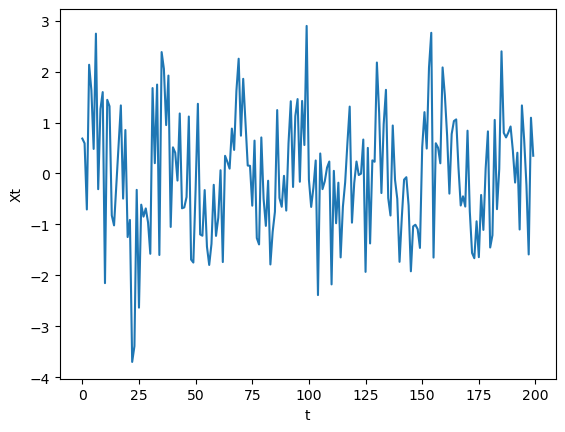

In [36]:
import matplotlib.pyplot as plt
import numpy as np

e = np.random.normal(loc=0.0, scale=1.0, size=200)
t = list(range(len(e)))
seasonality = []
for element in t:
    seasonality.append(np.sin(2*np.pi*element/30))

X = []
i = 0
for element in e:
    X.append(element + seasonality[i])
    i+=1
plt.plot(t,X)
plt.xlabel('t')
plt.ylabel('Xt')



#### 1.2.2.3 Models mit Trend und Saisonalität

Abbildung 1.9

Text(0, 0.5, 'Xt')

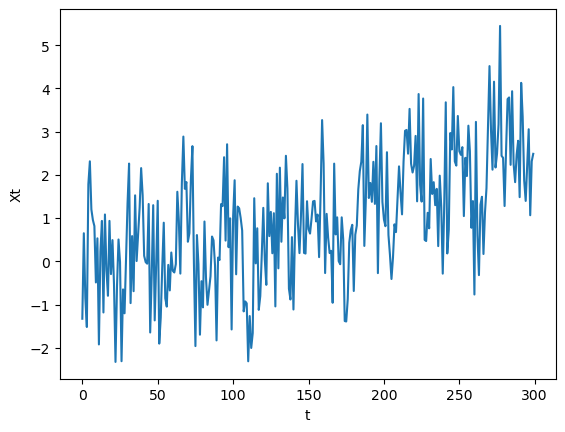

In [37]:

import matplotlib.pyplot as plt
import numpy as np

e = np.random.normal(loc=0.0, scale=1.0, size=300)
t = list(range(len(e)))
seasonality = []
for element in t:
    seasonality.append(np.sin(2*np.pi*element/30))

trend = []
# Trendkomponent m(t) = 1/3*x^2
for element in t:
    trend.append((1/3) * ((element/100) ** 2))
    
X = []
i = 0
for element in e:
    X.append(element + seasonality[i] + trend[i])
    i+=1
plt.plot(t,X)
plt.xlabel('t')
plt.ylabel('Xt')


### 1.3 Grundlegende Kennzahlen von Zeitreihen

#### 1.3.1 Autokovarianz

Abbildung 1.10

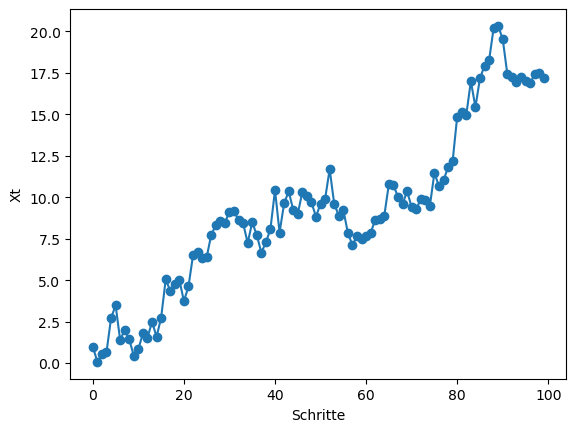

In [12]:
from random import random
from random import gauss
import matplotlib.pyplot as plt
y = [1]
A0 = 0
A1 = 1
iid = np.random.normal(loc=0,scale=1,size=size)
for i in range(99):
    y.append(A0 + A1* y[i] + iid[i])

x = list(range(100))
fig, axs = plt.subplots()
plt.xlabel("Schritte")
plt.ylabel("Xt")
axs.plot(x, y, "-o")



#### 1.3.2 Autokorrelationsfunktion

Abbildung 1.11

Text(0, 0.5, 'Autokorrelation')

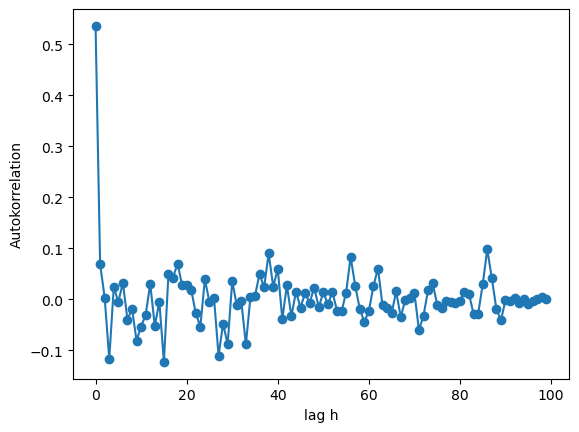

In [15]:
import matplotlib.pyplot as plt
autokorrelation = [x for x in autokovarianz_list]
x = list(range(100))
fig, axs = plt.subplots()
axs.plot(x, autokorrelation, "-o")
plt.xlabel("lag h")
plt.ylabel("Autokorrelation")